# Introduction to regression and classificiation

### Imports for this lesson

In [69]:
import numpy as np
import matplotlib.pyplot as plt
# for typing
import numpy.typing as npt
from typing import Tuple

## Linear Regression

In [70]:
# load dataset
X = np.loadtxt("data/linear_regression/weight.csv", delimiter=",")
y = np.loadtxt("data/linear_regression/height.csv", delimiter=",")
print(f"First 5 weights: {X[:5]}")
print(f"First 5 heights: {y[:5]}")

First 5 weights: [109.72098511  73.62273185  96.49755015  99.80950419  93.59861876]
First 5 heights: [1.87571423 1.74706036 1.88239668 1.82196685 1.77499761]


In [71]:
class LinearRegression:
    """Linear regression class.

    Args:
        slope_0: initial slope.
        intercept_0: initial intercept.
    """
    def __init__(self, slope_0: float, intercept_0: float):
        self.slope_0 = slope_0
        self.intercept_0 = intercept_0

    def fit(self,X: npt.NDArray,y: npt.NDArray, learning_rate: float, epochs:float):
        """ Implements standard gradient descent to fit training data.

        Args:
            X: data samples.
            y: data targets.
            learning_rate: learning rate for the gradient descent algorithm.
            epochs: number of iterations.
        """
        #initialize slope and intercept
        self.slope = self.slope_0
        self.intercept = self.intercept_0
        self.error = []

        for i in range(epochs):
            self.dcostdm =  np.sum(np.multiply(((self.slope*X+
                                                 self.intercept)-y),X))*2/X.shape[0]
            self.dcostdc = np.sum(((self.slope*X+self.intercept)-y))*2/X.shape[0]            
            self.slope -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc
            training_prediction = self.predict(X)
            error = self.compute_error(training_prediction, y)
            self.error.append(error)
    
    def compute_error(self, prediction: npt.NDArray, y:npt.NDArray)->float:
        """Compute the MSE of a prediction vector given the true target vector.

        Args:
            prediction: the prediction.
            y: the true target vector
        Returns:
            the MSE.
        
        """
        return np.linalg.norm(prediction - y)**2/prediction.shape[0]

    def predict(self,X: npt.NDArray) -> npt.NDArray:
        """ Perform a prediction given input data. 

        Args:
            X: data samples.

        Returns:
            the prediction.
        """
        product =  self.slope*X+self.intercept
        return product

In [72]:
# shuffling the dataset
np.random.seed(42)
data = np.c_[X,y]
np.random.shuffle(data)
X_shuffled, y_shuffled = data[:,0], data[:,1]

In [73]:
#standardization of the dataset
mean_weight = np.mean(X_shuffled)
std_weight = np.std(X_shuffled)
mean_height = np.mean(y_shuffled)
std_height = np.std(y_shuffled)
X_norm = (X_shuffled-mean_weight)/std_weight
y_norm = (y_shuffled-mean_height)/std_height

In [74]:
# train-test splitting
X_train=X_norm[:180]
X_test=X_norm[180:240]
y_train=y_norm[:180]
y_test=y_norm[180:240]

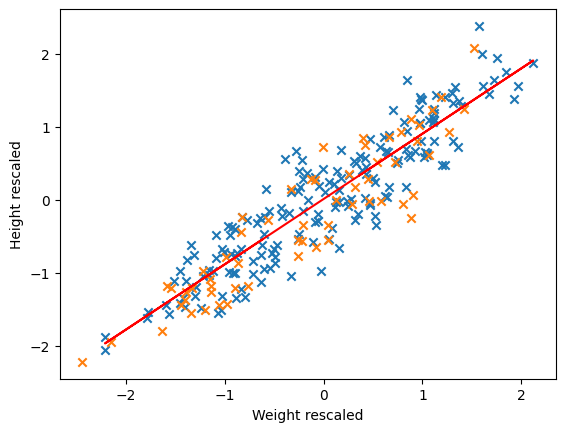

0.8941031442691002 0.012893006779845407


In [75]:
slope_0 = np.random.normal(-1,1)
intercept_0 = np.random.rand(1)[0]

lr = LinearRegression(slope_0, intercept_0)
lr.fit(X_train,y_train, 0.1,50)
plt.scatter(X_train,y_train, marker="x")
pred = lr.predict(X_train)
plt.plot(X_train,pred,'r')
plt.scatter(X_test, y_test, marker="x")
plt.xlabel("Weight rescaled")
plt.ylabel("Height rescaled")
plt.show()
print(lr.slope, lr.intercept)

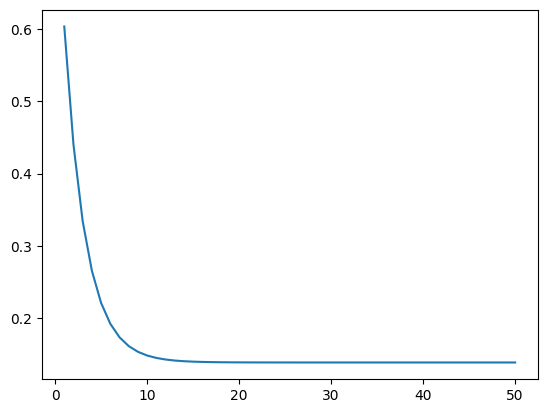

In [76]:
# learning curve
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()

In [77]:
# test set error
test_pred = lr.predict(X_test)
lr.compute_error(test_pred, y_test)

0.1486132732586686

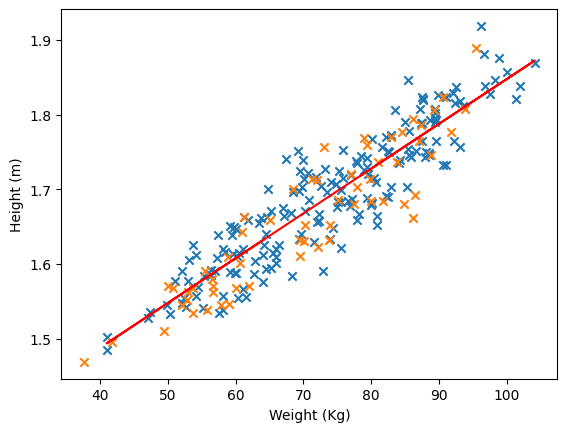

In [78]:
# let's see how is the prediction in the un-normalized dataset
plt.scatter(X_shuffled[:180],y_shuffled[:180], marker="x")
plt.scatter(X_shuffled[180:240],y_shuffled[180:240], marker="x")
new_slope = std_height*lr.slope/std_weight
new_intercept = lr.intercept*std_height - lr.slope*std_height*mean_weight/std_weight + mean_height
pred = new_slope*X_shuffled[:180]+new_intercept
plt.plot(X_shuffled[:180],pred,'r')
plt.xlabel("Weight (Kg)")
plt.ylabel("Height (m)")
plt.show()

## Logistic Regression

### A toy example

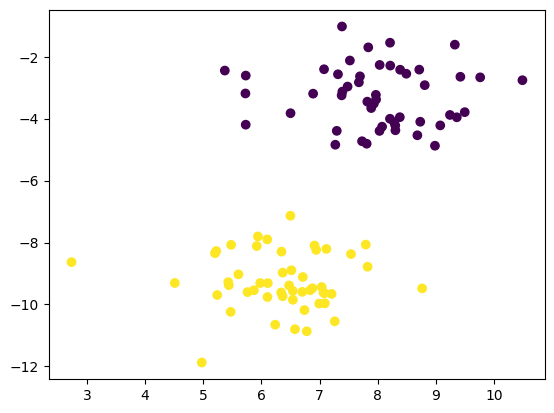

In [110]:
# load and see data
X = np.loadtxt("data/logistic_regression/toy_logistic_X.csv", delimiter = ",")
y = np.loadtxt("data/logistic_regression/toy_logistic_y.csv", delimiter = ",")
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [111]:
class LogisticRegression:
    """Logistic regression class.
    
    Args:
        initial_weights: vector of the initial weights.
    """
    
    def __init__ (self, initial_weights: npt.NDArray):
        self.initial_weights = initial_weights
        
    def fit (self,X: npt.NDArray,y: npt.NDArray, epochs: int, learning_rate: float): 
        """ Implements standard gradient descent to fit training data.

        Args:
            X: data samples.
            y: data targets.
            learning_rate: learning rate for the gradient descent algorithm.
            epochs: number of iterations.
        """
        
        # weights initialization
        self.weights = self.initial_weights
        self.error=[]
        
        for i in range(epochs):
            # compute \sigma(Xw)
            output=(self.sigmoid(self.dot_product(X)))
            errors=(y-output)
            # update weights except the last one
            self.weights[:-1]+=learning_rate*X.T.dot(errors)
            # last weight update rule = <output, ones> where ones
            # is the identically 1 vector.
            self.weights[-1]+=learning_rate*errors.sum()
            # compute the cost function
            error = (-y.dot(np.log(output))-((1 - y).dot(np.log(1 - output)))) 
            self.error.append(error)
        
    def dot_product(self,X:npt.NDArray) -> npt.NDArray:
        """Compute the product X_extend*w, where X_extend is the matrix X
        extended with a row of ones (inserted as the last row).

        Args:
            X: data samples.
        
        Returns:
            X_extend*w.
        """
        return np.dot(X,self.weights[:-1])+self.weights[-1]
        
    def sigmoid(self,z:npt.NDArray) -> npt.NDArray:
        """Implements the sigmoid function.

        Args:
            z: input array.

        Returns:
            the value of the sigmoid in z (component-wise).
        """
        return 1/(1+np.exp(-z))
        
    def predict(self,X: npt.NDArray) -> npt.NDArray:
        """ Perform a prediction given input data. 

        Args:
            X: data samples.

        Returns:
            the prediction.
        """        
        return np.where(self.sigmoid(self.dot_product(X))>=0.5,1,0)

In [112]:
# shuffling the dataset
np.random.seed(42)
data = np.c_[X,y]
np.random.shuffle(data)
num_features = X.shape[1]
X_shuffled = data[:,:num_features]
y_shuffled = data[:,num_features]

In [113]:
#standardization of the dataset
mean_X = np.mean(X_shuffled, axis= 0)
std_X = np.std(X_shuffled, axis = 0)
X_norm = (X_shuffled-mean_X)/std_X

In [114]:
# train-test split
X_train=X_norm[:70]
X_test=X_norm[70:]
y_train=y_shuffled[:70]
y_test=y_shuffled[70:]

print('mean_1:',X_train[:,0].mean(),X_test[:,0].mean())
print('mean_2:',X_train[:,1].mean(),X_test[:,1].mean())

mean_1: -0.08760514271520072 0.20441199966880655
mean_2: -0.013492381378623157 0.031482223216789826


In [115]:
np.random.seed(42)
initial_weights = np.random.normal(0,1, size= X.shape[1] + 1)
lr=LogisticRegression(initial_weights)
lr.fit(X=X_train, y=y_train, epochs = 500, learning_rate=0.001)

y_pred=lr.predict(X_test)
print('Misclassifications:',(y_test!=y_pred).sum())

Misclassifications: 0


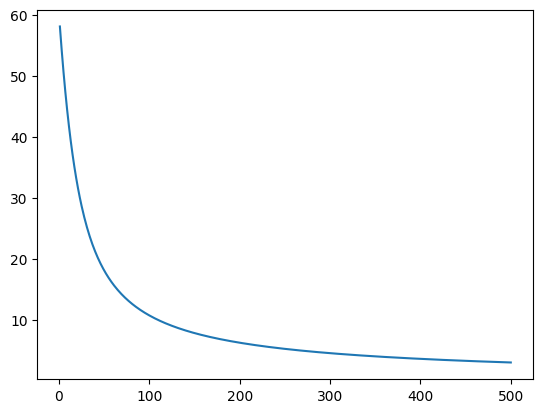

In [116]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()

In [117]:
# Finding slope and intercept for decission line ploting
slope=(0-(-lr.weights[2]/lr.weights[1]))/(-lr.weights[2]/lr.weights[0])
intercept=-lr.weights[2]/lr.weights[1]

print('slope:',slope,'intercept:',intercept)

slope: -0.27581320849884966 intercept: 0.022748292447263195


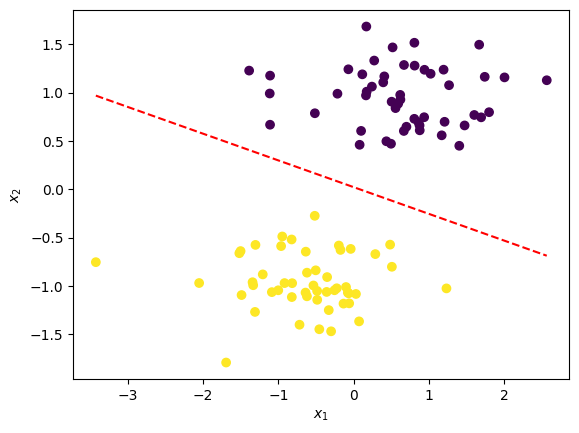

In [118]:
# Drawing decision boundary over the entire dataset
plt.scatter(X_norm[:,0],X_norm[:,1],c=y_shuffled)
plt.plot(np.linspace(X_norm[:,0].min(),X_norm[:,0].max(),100),
        (np.linspace(X_norm[:,0].min(),X_norm[:,0].max(),100))*slope+intercept,'r--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### The Sonar dataset

In [121]:
# rock = 0, mine = 1
data = np.loadtxt("data/logistic_regression/sonar.all-data.csv", delimiter = ",")
X = data[:, :-1]
y = data[:, -1]

In [122]:
# shuffling the dataset
np.random.seed(42)
np.random.shuffle(data)
num_features = X.shape[1]
X_shuffled = data[:,:num_features]
y_shuffled = data[:,num_features]

In [125]:
#standardization of the dataset
mean_X = np.mean(X_shuffled, axis= 0)
std_X = np.std(X_shuffled, axis = 0)
X_norm = (X_shuffled-mean_X)/std_X

In [142]:
# train-test split
X_train=X_norm[:170]
X_test=X_norm[170:]
y_train=y_shuffled[:170]
y_test=y_shuffled[170:]

print('mean_1:',X_train[:,0].mean(),X_test[:,0].mean())
print('mean_2:',X_train[:,1].mean(),X_test[:,1].mean())

mean_1: -0.00035141707754956706 0.0015721290311419584
mean_2: 0.03477617307149254 -0.1555776163724698


In [176]:
np.random.seed(42)
initial_weights = np.random.normal(0,1, size= X.shape[1] + 1)
lr=LogisticRegression(initial_weights)
lr.fit(X=X_train, y=y_train, epochs = 500, learning_rate=0.01)

train_prediction = lr.predict(X_train)
test_prediction=lr.predict(X_test)
missclassification_train = (y_train!=train_prediction).sum()
missclassification_test = (y_test!=test_prediction).sum()
print('Misclassifications Training:', missclassification_train)
print('Misclassifications Test:',missclassification_test)
print('Accuracy Training:', 1 - missclassification_train/X_train.shape[0])
print('Accuracy Test:', 1 - missclassification_test/X_test.shape[0])

Misclassifications Training: 2
Misclassifications Test: 5
Accuracy Training: 0.9882352941176471
Accuracy Test: 0.868421052631579


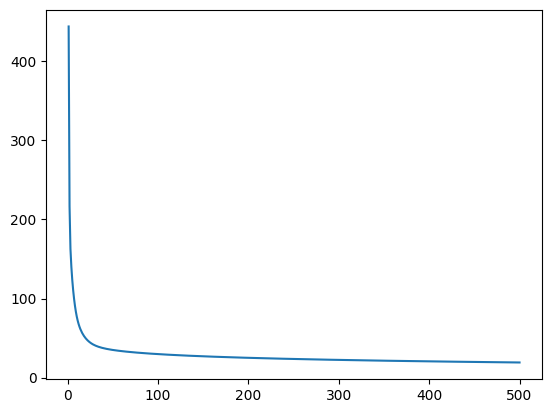

In [177]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()